In [ ]:
# #colab에서 한글이 깨질때 나눔폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,021 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

In [ ]:
from google.colab import drive
drive.mount('./MyDrive')

Drive already mounted at ./MyDrive; to attempt to forcibly remount, call drive.mount("./MyDrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
jobis_df = pd.read_csv('/content/MyDrive/MyDrive/Jobis_3o3.csv', encoding="utf-8")

In [ ]:
# 한글 폰트 적용
plt.rc('font', family='NanumBarunGothic')
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid') 
# 캔버스 사이즈 적용
plt.rcParams["figure.figsize"] = (12, 9)

# 컬럼 정보

*   age: 고객의 만 나이
*  gender: 고객의 성별
*   year: 소득이 발생한 연도(귀속년도)
*   refund: 예상환급액입니다.
*   fee: 수수료입니다.
*   has_paid: 수수료를 결제했는지의 여부
*   income_근로: 고객의 근로소득(월급/일용직급여)
*   income_사업: 고객의 사업소득(프리랜서 소득)
*   income_기타: 고객의 기타소득(그외 기타 소득)






In [ ]:
jobis_df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,NaN
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,NaN,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,NaN,1461000.0,NaN
3,27.0,M,2019,410000.0,16200.0,False,NaN,2471000.0,NaN
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,NaN
...,...,...,...,...,...,...,...,...,...
99995,27.0,F,2019,301000.0,11900.0,True,NaN,NaN,680000.0
99996,62.0,F,2019,77000.0,1300.0,True,NaN,463000.0,NaN
99997,24.0,M,2020,9000.0,400.0,False,7923000.0,54000.0,NaN
99998,24.0,M,2019,34000.0,400.0,True,NaN,204000.0,NaN


In [ ]:
jobis_df['year'].sort_values()

27765    2015
96594    2015
55560    2015
96597    2015
55568    2015
         ... 
78033    2020
78032    2020
78031    2020
37586    2020
31589    2020
Name: year, Length: 100000, dtype: int64

In [ ]:
print(jobis_df.shape) # 데이터의 행, 열 개수 출력
print(jobis_df.dtypes) # 데이터의 타입 출력

(100000, 9)
age          float64
gender        object
year           int64
refund       float64
fee          float64
has_paid        bool
income_근로    float64
income_사업    float64
income_기타    float64
dtype: object


In [ ]:
jobis_df.isna().sum() # NaN값이 income 항목에서 많이 나옴


age              0
gender           0
year             0
refund           0
fee              0
has_paid         0
income_근로    59209
income_사업    21773
income_기타    74740
dtype: int64

In [ ]:
jobis_df.describe() # 컬럼별 요약 통계 지표 출력

,age,year,refund,fee,income_근로,income_사업,income_기타
count,100000.00000,100000.000000,1.000000e+05,100000.000000,4.079100e+04,7.822700e+04,2.526000e+04
mean,29.00096,2018.111300,2.081422e+05,7247.641000,6.432597e+06,1.511712e+06,6.362834e+05
std,7.76819,1.495812,3.071744e+05,11926.896979,6.583716e+06,2.449810e+06,1.484947e+06
min,15.00000,2015.000000,-8.265000e+06,400.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,24.00000,2017.000000,3.300000e+04,400.000000,1.616000e+06,1.770000e+05,8.200000e+04
50%,27.00000,2018.000000,9.900000e+04,4300.000000,4.507000e+06,6.190000e+05,2.130000e+05
75%,31.00000,2019.000000,2.540000e+05,8500.000000,9.301000e+06,1.601000e+06,5.820000e+05
max,81.00000,2020.000000,7.725000e+06,307000.000000,1.823350e+08,3.993400e+07,6.281000e+07




*   fee 25%: 400 50%: 4300 75%: 8500 mean: 7247 대략 7250
*   fee 대부분이 10000을 넘지 않음
*   age 25%: 24 50%: 27 75%: 31 mean: 29
*   age 20~30대가 주 고객층 일꺼 같음



In [ ]:
jobis_df.corr() # 상관관계 1에 가까울수록 연관성이 아주 크다는 의미

,age,year,refund,fee,has_paid,income_근로,income_사업,income_기타
age,1.000000,-0.113500,0.078485,0.072135,-0.022918,0.341343,0.097144,0.105064
year,-0.113500,1.000000,0.140977,0.169537,-0.136060,0.075071,0.149177,0.035263
refund,0.078485,0.140977,1.000000,0.969427,-0.094061,-0.110196,0.785344,0.737711
fee,0.072135,0.169537,0.969427,1.000000,-0.117695,-0.112256,0.777466,0.742307
has_paid,-0.022918,-0.136060,-0.094061,-0.117695,1.000000,-0.014584,-0.103945,-0.108696
income_근로,0.341343,0.075071,-0.110196,-0.112256,-0.014584,1.000000,-0.091732,0.044542
income_사업,0.097144,0.149177,0.785344,0.777466,-0.103945,-0.091732,1.000000,0.067535
income_기타,0.105064,0.035263,0.737711,0.742307,-0.108696,0.044542,0.067535,1.000000


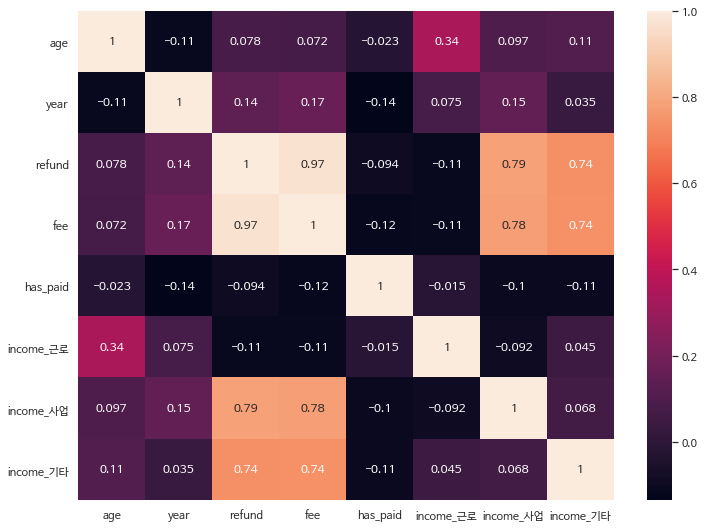

In [ ]:
sns.heatmap(jobis_df.corr(), annot=True)


# 상관관계

refund / fee 0.97

refund / income_사업 0.79

fee / income_사업 0.78

refund / income_기타 0.74

fee / income_기타 0.74

age / income_근로 0.34

year / fee 0.17 

year / income_사업 0.15

year / refund 0.14

age / income_기타 0.11

age / income_사업 0.097

age / refund 0.078

year / income_근로 0.075

age / fee 0.072

income_사업 / income_기타 0.068

income_근로 / income_기타 0.045

year / income_기타 0.035

---
# 상관관계가 높은 항목

refund / fee 0.97

refund / income_사업 0.79

fee / income_사업 0.78

refund / income_기타 0.74

ee / income_기타 0.74

age / income_근로 0.34

year / fee 0.17 

year / income_사업 0.15

year / refund 0.14

age / income_기타 0.11

# 개인적인 전처리 방향


1.   고객의 결제여부에 영향을 미치는 요인으로 가장 유력한것 3항목 추출
     
     refund / fee, refund / income_사업, fee / income_사업

2.   수수료 결제 금액의 합을 높이기 위해서 항목 조합할 것

     상관관계 0.1이상 항목에서 조합할 것


3.   수수료를 지불한 사람과 지불하지 않은 사람의 차이점 분석






In [ ]:
jobis_df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,NaN
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,NaN,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,NaN,1461000.0,NaN
3,27.0,M,2019,410000.0,16200.0,False,NaN,2471000.0,NaN
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,NaN
...,...,...,...,...,...,...,...,...,...
99995,27.0,F,2019,301000.0,11900.0,True,NaN,NaN,680000.0
99996,62.0,F,2019,77000.0,1300.0,True,NaN,463000.0,NaN
99997,24.0,M,2020,9000.0,400.0,False,7923000.0,54000.0,NaN
99998,24.0,M,2019,34000.0,400.0,True,NaN,204000.0,NaN


In [ ]:
# NaN값 0으로 채우기 --> 연속성이나 기준점이 없기 때문에 0으로 채움
jobis_df['income_근로'] = jobis_df['income_근로'].fillna(0)
jobis_df['income_사업'] = jobis_df['income_사업'].fillna(0)
jobis_df['income_기타'] = jobis_df['income_기타'].fillna(0)

In [ ]:
jobis_df['refund_rate'] = round(jobis_df['fee']/jobis_df['refund'], 4)*100 # refund * refund_rate = fee 이므로 역으로 계산해서 구함
jobis_df['refund_rate'] = jobis_df['refund_rate'].replace([np.inf, -np.inf], 0)
jobis_df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,refund_rate
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,0.0,8.00
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,0.0,1815000.0,1.70
2,28.0,F,2017,289000.0,11500.0,False,0.0,1461000.0,0.0,3.98
3,27.0,M,2019,410000.0,16200.0,False,0.0,2471000.0,0.0,3.95
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,0.0,3.77
...,...,...,...,...,...,...,...,...,...,...
99995,27.0,F,2019,301000.0,11900.0,True,0.0,0.0,680000.0,3.95
99996,62.0,F,2019,77000.0,1300.0,True,0.0,463000.0,0.0,1.69
99997,24.0,M,2020,9000.0,400.0,False,7923000.0,54000.0,0.0,4.44
99998,24.0,M,2019,34000.0,400.0,True,0.0,204000.0,0.0,1.18


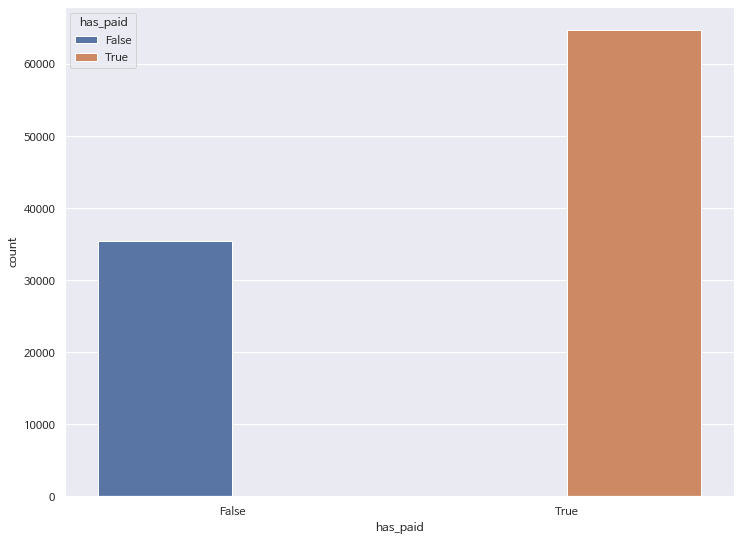

In [ ]:
sns.countplot(x='has_paid', hue='has_paid', data=jobis_df)
plt.show()

# 수수료를 지불한 비율


*   True = 65000 정도 카운팅 되었기 때문에 65프로정도 수수료 결제
*   False = 35000 정도 카운팅 되었기 때문에 35프로정도 수수료 결제





In [ ]:
job_has_paid = jobis_df[jobis_df['has_paid']==True] # 수수료를 지불한 사람들 기준 (row:64643 --> 대략 65000)
job_has_paid

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,refund_rate
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,0.0,1815000.0,1.70
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,0.0,3.77
5,39.0,F,2015,546000.0,12800.0,True,0.0,3628000.0,213000.0,2.34
6,40.0,F,2019,4000.0,400.0,True,11512000.0,24000.0,0.0,10.00
7,23.0,M,2017,10000.0,400.0,True,186000.0,74000.0,0.0,4.00
...,...,...,...,...,...,...,...,...,...,...
99994,32.0,M,2016,101000.0,3000.0,True,0.0,0.0,0.0,2.97
99995,27.0,F,2019,301000.0,11900.0,True,0.0,0.0,680000.0,3.95
99996,62.0,F,2019,77000.0,1300.0,True,0.0,463000.0,0.0,1.69
99998,24.0,M,2019,34000.0,400.0,True,0.0,204000.0,0.0,1.18


In [ ]:
job_has_paid.isnull().sum()

age            0
gender         0
year           0
refund         0
fee            0
has_paid       0
income_근로      0
income_사업      0
income_기타      0
refund_rate    0
dtype: int64

In [ ]:
job_has_paid.median() # 수수료를 지불한 사람들의 중앙값

age                27.00
year             2018.00
refund          94000.00
fee              3000.00
has_paid            1.00
income_근로           0.00
income_사업      422000.00
income_기타           0.00
refund_rate         2.86
dtype: float64

In [ ]:
job_has_false = jobis_df[jobis_df['has_paid']==False] # 수수료를 지불하지 않은 사람들 (row: 35357 --> 대략 35000)
job_has_false

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,refund_rate
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,0.0,8.00
2,28.0,F,2017,289000.0,11500.0,False,0.0,1461000.0,0.0,3.98
3,27.0,M,2019,410000.0,16200.0,False,0.0,2471000.0,0.0,3.95
8,54.0,M,2016,1847000.0,73100.0,False,18728000.0,0.0,2841000.0,3.96
9,22.0,M,2018,51000.0,900.0,False,0.0,0.0,153000.0,1.76
...,...,...,...,...,...,...,...,...,...,...
99984,25.0,F,2018,286000.0,8500.0,False,0.0,0.0,0.0,2.97
99988,45.0,M,2018,152000.0,4300.0,False,0.0,0.0,0.0,2.83
99992,25.0,F,2018,137000.0,3800.0,False,0.0,0.0,0.0,2.77
99993,32.0,F,2018,5000.0,400.0,False,7336000.0,28000.0,0.0,8.00


In [ ]:
job_has_false.isnull().sum()

age            0
gender         0
year           0
refund         0
fee            0
has_paid       0
income_근로      0
income_사업      0
income_기타      0
refund_rate    0
dtype: int64

In [ ]:
job_has_false.median() # 수수료를 지불하지 않은 사람들 중앙값

age                27.00
year             2019.00
refund         110000.00
fee              4300.00
has_paid            0.00
income_근로           0.00
income_사업      115000.00
income_기타           0.00
refund_rate         3.84
dtype: float64

In [ ]:
jobis = jobis_df
jobis['has_paid'] = jobis['has_paid'].replace({True:1, False:0}) # True / False라서 classification으로 작업해야 할 가능성이 높아서 미리 변경
jobis['gender'] = jobis['gender'].replace({'M':1, 'F':0}) # Male / FeMale라서 classification으로 작업해야 할 가능성이 높아서 미리 변경
jobis

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,refund_rate
0,27.0,0,2019,5000.0,400.0,0,10001000.0,61000.0,0.0,8.00
1,34.0,1,2018,100000.0,1700.0,1,18092000.0,0.0,1815000.0,1.70
2,28.0,0,2017,289000.0,11500.0,0,0.0,1461000.0,0.0,3.98
3,27.0,1,2019,410000.0,16200.0,0,0.0,2471000.0,0.0,3.95
4,26.0,0,2016,114000.0,4300.0,1,0.0,689000.0,0.0,3.77
...,...,...,...,...,...,...,...,...,...,...
99995,27.0,0,2019,301000.0,11900.0,1,0.0,0.0,680000.0,3.95
99996,62.0,0,2019,77000.0,1300.0,1,0.0,463000.0,0.0,1.69
99997,24.0,1,2020,9000.0,400.0,0,7923000.0,54000.0,0.0,4.44
99998,24.0,1,2019,34000.0,400.0,1,0.0,204000.0,0.0,1.18


In [ ]:
jobis = jobis.drop(index=jobis.query('refund < 0').index) # 마이너스일 때 수수료는 환급해주기 때문에 드랍
jobis

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,refund_rate
0,27.0,0,2019,5000.0,400.0,0,10001000.0,61000.0,0.0,8.00
1,34.0,1,2018,100000.0,1700.0,1,18092000.0,0.0,1815000.0,1.70
2,28.0,0,2017,289000.0,11500.0,0,0.0,1461000.0,0.0,3.98
3,27.0,1,2019,410000.0,16200.0,0,0.0,2471000.0,0.0,3.95
4,26.0,0,2016,114000.0,4300.0,1,0.0,689000.0,0.0,3.77
...,...,...,...,...,...,...,...,...,...,...
99995,27.0,0,2019,301000.0,11900.0,1,0.0,0.0,680000.0,3.95
99996,62.0,0,2019,77000.0,1300.0,1,0.0,463000.0,0.0,1.69
99997,24.0,1,2020,9000.0,400.0,0,7923000.0,54000.0,0.0,4.44
99998,24.0,1,2019,34000.0,400.0,1,0.0,204000.0,0.0,1.18


# True / False의 중앙값 비교



*   age의 중앙값은 27으로 동일
*   refund는 false가 7000정도 더 높음
*   fee는 false가 1300정도 더 높음
*   income_근로 false가 132000 더 높음 
*   income_사업 false가 133000 더 높음
*   income_기타 false가 59500 더 높음
*   refund_rate false가 0.98 더 높음







---
# 비교결과
False에 속한 사람들이 모든 항목이 더 높게 나옴

*   income_사업 자영업 또는 프리랜서로서 False가 더 높음
*   income_기타 기타소득 False가 더 높음
*   소득신고를 본인이 해야하는 사람들에게서 False가 더 많이 나오는 것 같음
*   refund_rate가 3.84보다 높을 때 False가 되는지 확인 해야할 듯
*   True / False 이기 때문에 분류(classification)으로 분석할 것














In [ ]:
job_a = jobis[jobis['income_근로'] != 0] # 근로가 0이 아닐 때 
job_a

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,refund_rate
0,27.0,0,2019,5000.0,400.0,0,10001000.0,61000.0,0.0,8.00
1,34.0,1,2018,100000.0,1700.0,1,18092000.0,0.0,1815000.0,1.70
6,40.0,0,2019,4000.0,400.0,1,11512000.0,24000.0,0.0,10.00
7,23.0,1,2017,10000.0,400.0,1,186000.0,74000.0,0.0,4.00
8,54.0,1,2016,1847000.0,73100.0,0,18728000.0,0.0,2841000.0,3.96
...,...,...,...,...,...,...,...,...,...,...
99987,29.0,0,2018,37000.0,400.0,1,10657000.0,224000.0,0.0,1.08
99991,30.0,1,2018,12000.0,400.0,1,692000.0,70000.0,0.0,3.33
99993,32.0,0,2018,5000.0,400.0,0,7336000.0,28000.0,0.0,8.00
99997,24.0,1,2020,9000.0,400.0,0,7923000.0,54000.0,0.0,4.44


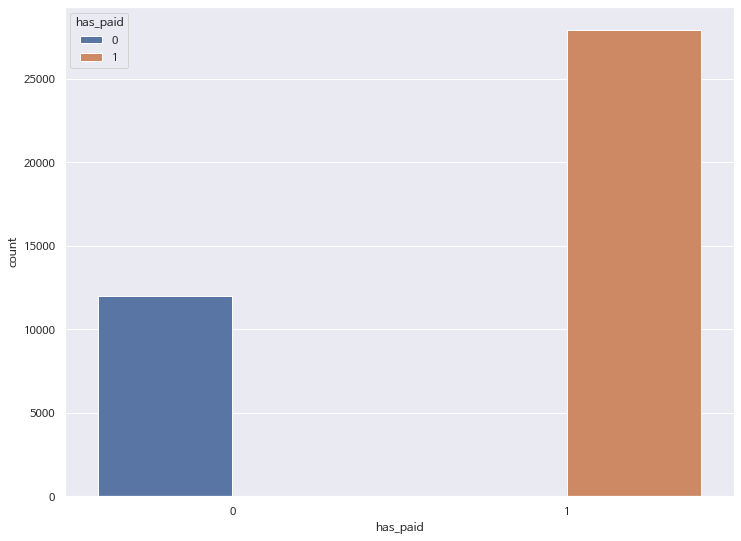

1    0.699616
0    0.300384
Name: has_paid, dtype: float64

In [ ]:
sns.countplot(x='has_paid', hue='has_paid', data=job_a) # 결제 한 비율: 69.9%
plt.show()
job_a['has_paid'].value_counts(normalize=True)

In [ ]:
job_b = jobis[jobis['income_사업']!=0] # 사업이 0이 아닐 때
job_b

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,refund_rate
0,27.0,0,2019,5000.0,400.0,0,10001000.0,61000.0,0.0,8.00
2,28.0,0,2017,289000.0,11500.0,0,0.0,1461000.0,0.0,3.98
3,27.0,1,2019,410000.0,16200.0,0,0.0,2471000.0,0.0,3.95
4,26.0,0,2016,114000.0,4300.0,1,0.0,689000.0,0.0,3.77
5,39.0,0,2015,546000.0,12800.0,1,0.0,3628000.0,213000.0,2.34
...,...,...,...,...,...,...,...,...,...,...
99993,32.0,0,2018,5000.0,400.0,0,7336000.0,28000.0,0.0,8.00
99996,62.0,0,2019,77000.0,1300.0,1,0.0,463000.0,0.0,1.69
99997,24.0,1,2020,9000.0,400.0,0,7923000.0,54000.0,0.0,4.44
99998,24.0,1,2019,34000.0,400.0,1,0.0,204000.0,0.0,1.18


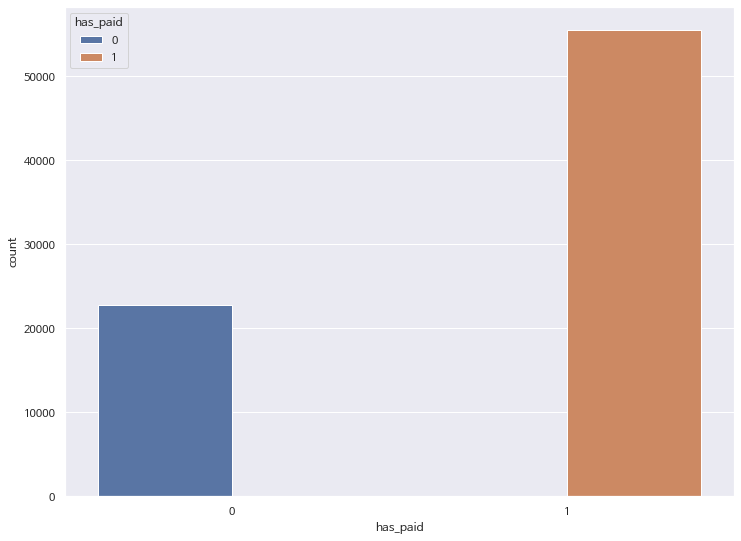

1    0.709385
0    0.290615
Name: has_paid, dtype: float64

In [ ]:
sns.countplot(x='has_paid', hue='has_paid', data=job_b) # 결제한 비율: 70.9%
plt.show() 
job_b['has_paid'].value_counts(normalize=True)

In [ ]:
job_c = jobis[jobis['income_기타']!=0] # 기타가 0이 아닐 때
job_c

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,refund_rate
1,34.0,1,2018,100000.0,1700.0,1,18092000.0,0.0,1815000.0,1.70
5,39.0,0,2015,546000.0,12800.0,1,0.0,3628000.0,213000.0,2.34
8,54.0,1,2016,1847000.0,73100.0,0,18728000.0,0.0,2841000.0,3.96
9,22.0,1,2018,51000.0,900.0,0,0.0,0.0,153000.0,1.76
11,25.0,0,2020,753000.0,29800.0,0,0.0,0.0,1828000.0,3.96
...,...,...,...,...,...,...,...,...,...,...
99978,27.0,1,2018,276000.0,19100.0,1,0.0,1663000.0,775000.0,6.92
99980,42.0,1,2018,120000.0,4700.0,1,14949000.0,0.0,1065000.0,3.92
99982,28.0,0,2020,94000.0,1700.0,1,10636000.0,0.0,85000.0,1.81
99986,40.0,0,2016,47000.0,400.0,1,0.0,281000.0,43000.0,0.85


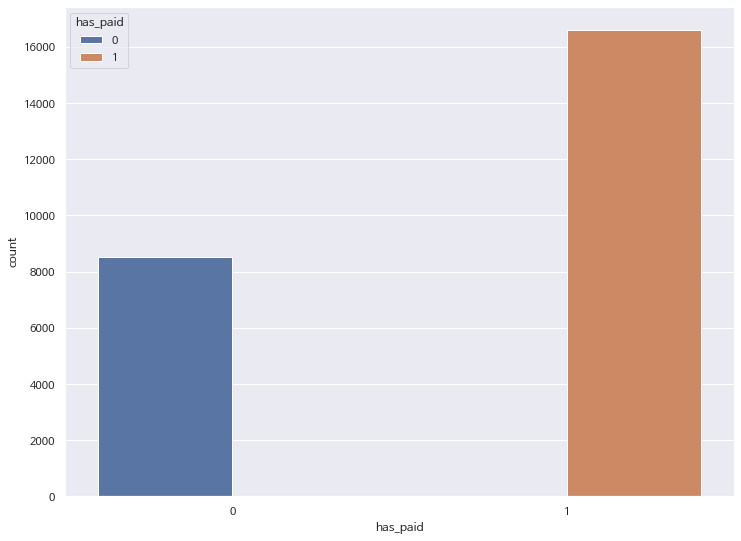

1    0.660427
0    0.339573
Name: has_paid, dtype: float64

In [ ]:
sns.countplot(x='has_paid', hue='has_paid', data=job_c) # 결제한 비율: 66%
plt.show()

job_c['has_paid'].value_counts(normalize=True)

In [ ]:
job_b['income_근로'].value_counts() # income_사업 !=0 일때 78155중 45366개가 income_근로가 58% 없음

0.0           45366
5102000.0        96
9184000.0        91
2551000.0        89
1531000.0        79
              ...  
9055000.0         1
11153000.0        1
6831000.0         1
16806000.0        1
10997000.0        1
Name: income_근로, Length: 12275, dtype: int64

In [ ]:
job_b['income_기타'].value_counts() # income_사업 !=0 일때 78155중 65553개가 income_기타가 83% 없음

0.0          65553
43000.0        563
21000.0        396
85000.0        390
128000.0       289
             ...  
5768000.0        1
3931000.0        1
1441000.0        1
1702000.0        1
4694000.0        1
Name: income_기타, Length: 1809, dtype: int64

# Income 사업이 결제의 비율이 가장 높음



*   삼쩜삼 수수료 책정 기준은 사업소득
https://help.jobis.co/hc/ko/articles/900004453606--%EC%82%BC%EC%A9%9C%EC%82%BC-%EC%88%98%EC%88%98%EB%A3%8C%EB%8A%94-%EB%B9%84%EC%8B%B8%EB%8B%A4-%EC%A7%84%EC%8B%A4%EC%9D%80-

* income_사업이 0이 아닐 때 근로는 58%가 0이므로 영향력이 부족

* income_사업이 0이 아닐 때 기타는 82%가 0이므로 영향력이 많이 부족

*   income_사업을 주 타겟으로 잡고 마켓팅 계획 설립 해야함

*   사업이 주 타켓이므로 사업 or 프리랜서인 연령층을 분석













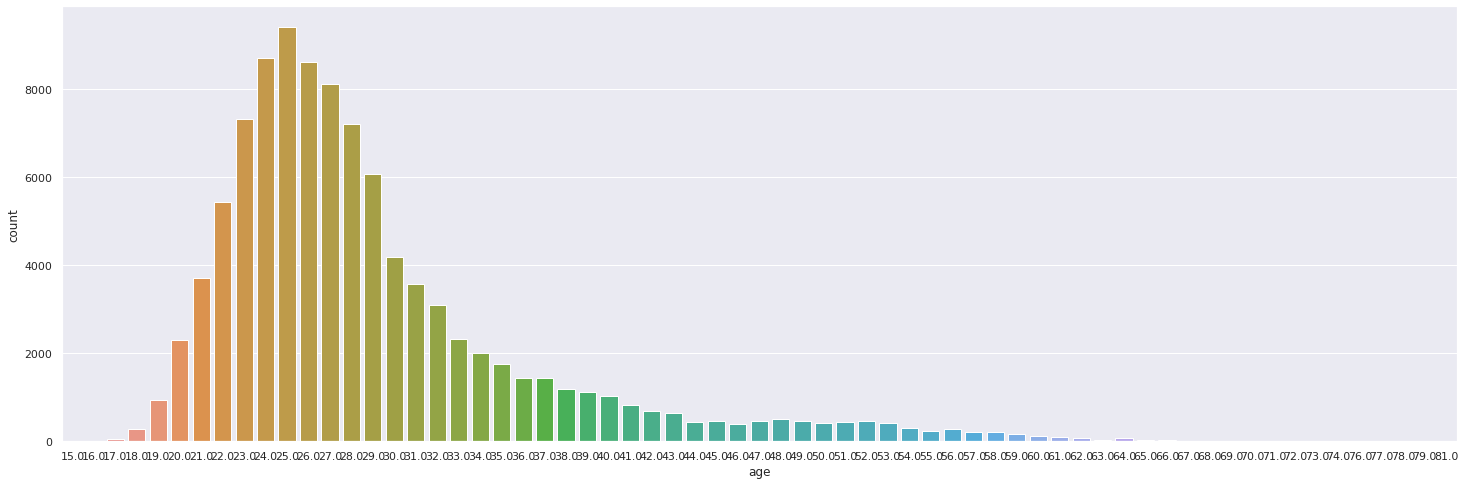

In [ ]:
sns.set(rc={'figure.figsize':(25,8)})
sns.countplot(x='age', data = jobis) # 주 결제 연령층 20대 중반에서 30대 초반까지가 주 결제층

In [ ]:
job_20 = jobis[jobis['age']>=20]
job_2035 = job_20[job_20['age']<=35]

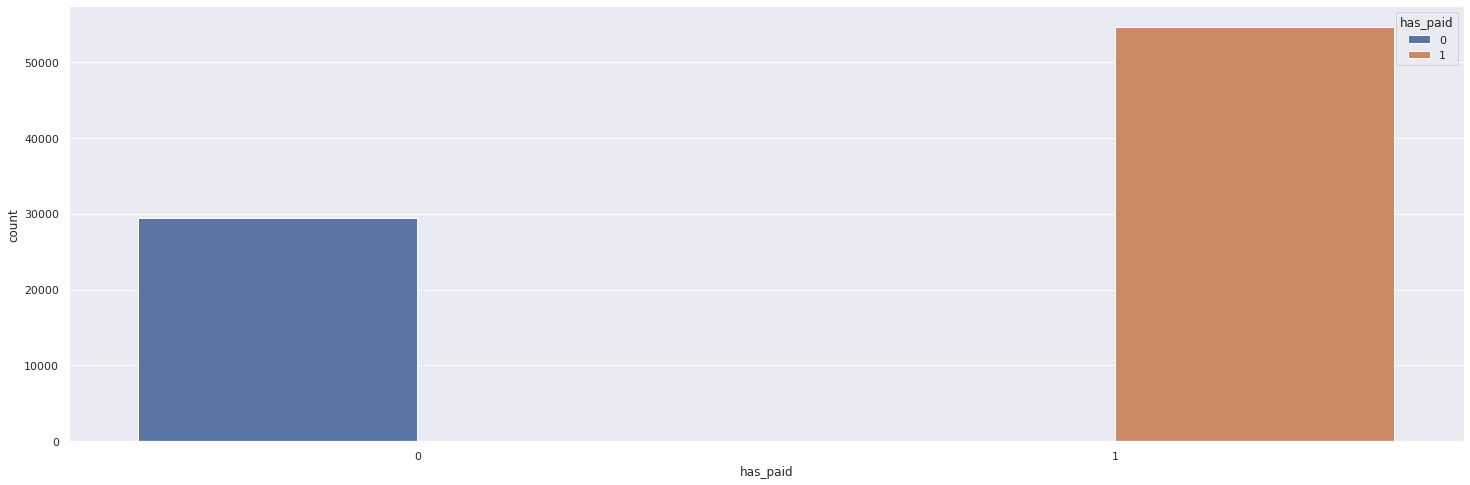

1    0.650191
0    0.349809
Name: has_paid, dtype: float64

In [ ]:
sns.countplot(x='has_paid', hue='has_paid', data=job_2035) # 결제한 비율: 65%
plt.show()

job_2035['has_paid'].value_counts(normalize=True)

In [ ]:
job_2035.count() # 100000개 row중 83940 row가 20-35세 대략 84%

age            83940
gender         83940
year           83940
refund         83940
fee            83940
has_paid       83940
income_근로      83940
income_사업      83940
income_기타      83940
refund_rate    83940
dtype: int64

In [ ]:
job_36 = jobis[jobis['age']>35]
job_3660 = job_36[job_36['age']<=60]

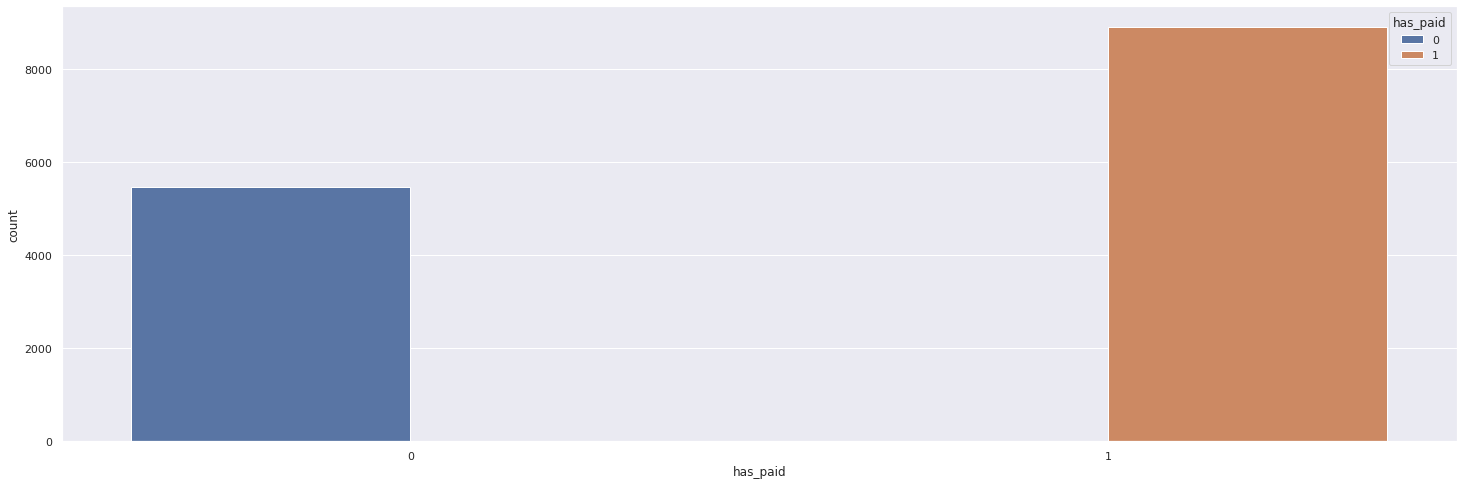

1    0.619412
0    0.380588
Name: has_paid, dtype: float64

In [ ]:
sns.countplot(x='has_paid', hue='has_paid', data=job_3660) # 결제한 비율: 61.9%
plt.show()

job_3660['has_paid'].value_counts(normalize=True)

In [ ]:
job_3660.count() # 100000개 row에서 14362개 row 대략 14.3%

age            14362
gender         14362
year           14362
refund         14362
fee            14362
has_paid       14362
income_근로      14362
income_사업      14362
income_기타      14362
refund_rate    14362
dtype: int64

# 주 고객 연령층 20대중반~30대 초반


*   어플 사용이 많은 연령층

*   사회 초년생일 가능성이 높은 연령대
*   사업이 높게 나와서 연령대가 40대가 높을 줄 알았는데 어플이기 때문에 젊은층이 높게 나오는것 같음

*   매출을 올리는 방법

 1.   강세인 부분을 더욱 강하게 
 2.   약세인 부분을 보완


*   개인적인 생각으로는 연령대가 높은 사업은 세무사와 같이 직접 일을 맡길 

 가능성이 높음 

 따라서 부분을 보완하는 방법으로 간다면 매출의 상승에 도움이 될것 같음









In [ ]:
job_2035.describe()

,age,year,refund,fee,has_paid,income_근로,income_사업,income_기타,refund_rate
count,83940.000000,83940.000000,8.394000e+04,83940.000000,83940.000000,8.394000e+04,8.394000e+04,8.394000e+04,83940.000000
mean,26.468025,2018.126447,2.028824e+05,7051.524899,0.650191,2.278012e+06,1.146693e+06,1.478512e+05,3.414590
std,3.620258,1.489148,2.957924e+05,11542.805930,0.476912,4.440822e+06,2.188362e+06,7.208155e+05,8.784851
min,20.000000,2015.000000,-0.000000e+00,400.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,24.000000,2017.000000,3.300000e+04,400.000000,0.000000,0.000000e+00,3.200000e+04,0.000000e+00,1.820000
50%,26.000000,2018.000000,9.700000e+04,3800.000000,1.000000,0.000000e+00,3.270000e+05,0.000000e+00,3.310000
75%,29.000000,2019.000000,2.470000e+05,8500.000000,1.000000,2.558000e+06,1.203000e+06,2.000000e+03,3.940000
max,35.000000,2020.000000,7.725000e+06,307000.000000,1.000000,4.489000e+07,3.993400e+07,3.323500e+07,1595.000000


In [ ]:
job_2035['income_사업'].value_counts(normalize=True) # 79%가 사업소득

0.0           0.214046
43000.0       0.007065
85000.0       0.005826
128000.0      0.005301
26000.0       0.005099
                ...   
6132000.0     0.000012
3088000.0     0.000012
19548000.0    0.000012
8033000.0     0.000012
4119000.0     0.000012
Name: income_사업, Length: 7764, dtype: float64

In [ ]:
job_2035['gender'].value_counts(normalize=True) # M: 51% / F: 48%

1    0.515285
0    0.484537
-    0.000179
Name: gender, dtype: float64

In [ ]:
job_2035aaa = job_2035[job_2035['fee']>=400]
job_2035aaa = job_2035aaa[job_2035aaa['fee']<3800] # 통계지표 25%~50%미만 집단 67.7% 결제
print(job_2035aaa['has_paid'].value_counts(normalize=True))

job_2035a = job_2035[job_2035['fee']>=3800] 
job_2035a = job_2035a[job_2035a['fee']<8500] # 통계지표 50~75%미만 집단 67.9% 결제
print(job_2035a['has_paid'].value_counts(normalize=True))

job_2035aa = job_2035[job_2035['fee']>=8500] # 통계지표 75% 이상 집단  59% 결제
print(job_2035aa['has_paid'].value_counts(normalize=True))

job_2035ab = job_2035[job_2035['fee']>=400] # 통계지표 25~75% 미만 집단 67% 결제
job_2035ab = job_2035ab[job_2035ab['fee']<8500]
print(job_2035ab['has_paid'].value_counts(normalize=True))

1    0.668514
0    0.331486
Name: has_paid, dtype: float64
1    0.679831
0    0.320169
Name: has_paid, dtype: float64
1    0.595557
0    0.404443
Name: has_paid, dtype: float64
1    0.671941
0    0.328059
Name: has_paid, dtype: float64


In [ ]:
job_2035b = job_2035[job_2035['gender']==1] # 2035 남자 중 사업소득 대략 78%
job_2035b['income_사업'].value_counts(normalize=True) 

0.0           0.217280
43000.0       0.007005
26000.0       0.005526
85000.0       0.005433
128000.0      0.005156
                ...   
8779000.0     0.000023
5655000.0     0.000023
5168000.0     0.000023
9732000.0     0.000023
11820000.0    0.000023
Name: income_사업, Length: 6120, dtype: float64

In [ ]:
job_2035ba = job_2035[job_2035['gender']==0] # 2035 여자 중 사업소득 대략 79%
job_2035ba['income_사업'].value_counts(normalize=True)

0.0          0.210317
43000.0      0.007130
85000.0      0.006245
128000.0     0.005458
213000.0     0.004696
               ...   
4959000.0    0.000025
2076000.0    0.000025
3606000.0    0.000025
1917000.0    0.000025
7340000.0    0.000025
Name: income_사업, Length: 5436, dtype: float64

In [ ]:
job_2035c = job_2035[job_2035['refund_rate']>=1.82] #통계지표 25~50% 미만 집단 72% 결제
job_2035c = job_2035c[job_2035c['refund_rate']< 3.31]
print(job_2035c['has_paid'].value_counts(normalize=True))

job_2035cc = job_2035[job_2035['refund_rate']>=3.31] #통계지표 50~75% 미만 집단 60% 결제
job_2035cc = job_2035cc[job_2035cc['refund_rate']< 3.94]
print(job_2035cc['has_paid'].value_counts(normalize=True))

job_2035ccc = job_2035[job_2035['refund_rate']>=3.94] #통계지표 75% 이상 집단 55% 결제
print(job_2035ccc['has_paid'].value_counts(normalize=True))

job_2035ca = job_2035[job_2035['refund_rate']>=1.82] #통계지표 25~75% 미만 집단 66% 결제
job_2035ca = job_2035ca[job_2035ca['refund_rate']< 3.94]
print(job_2035ca['has_paid'].value_counts(normalize=True))

1    0.727218
0    0.272782
Name: has_paid, dtype: float64
1    0.603779
0    0.396221
Name: has_paid, dtype: float64
1    0.553748
0    0.446252
Name: has_paid, dtype: float64
1    0.668514
0    0.331486
Name: has_paid, dtype: float64


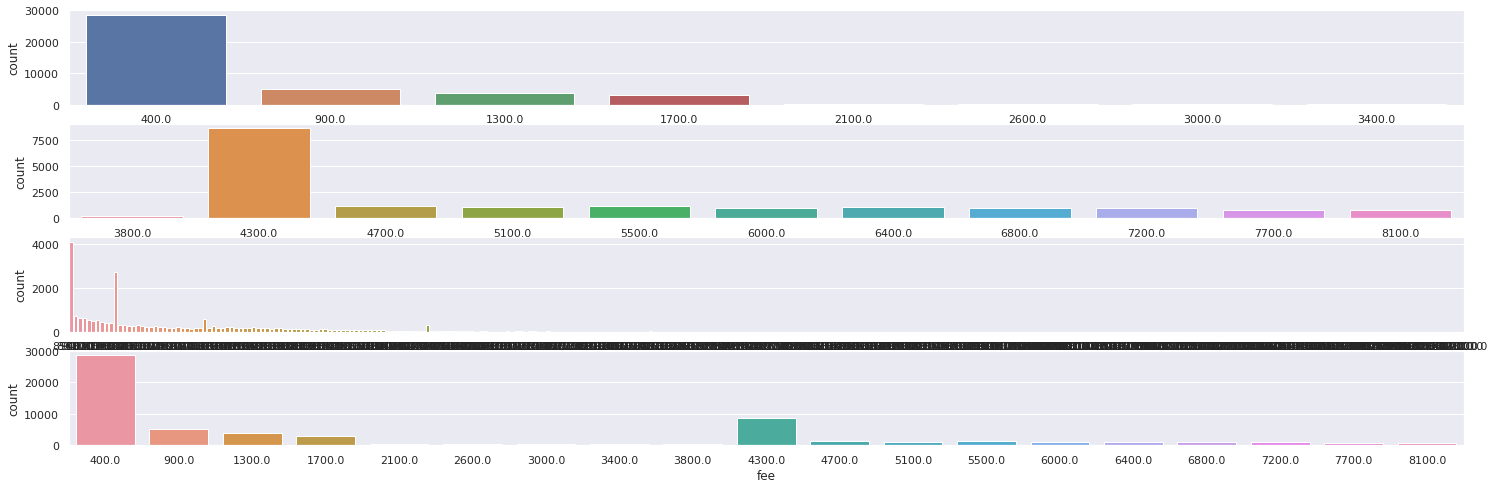

<Figure size 1080x360 with 0 Axes>

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1)
plt.figure(figsize=(15,5))

sns.countplot(data=job_2035aaa, x='fee', ax = ax1)
sns.countplot(data=job_2035a, x='fee', ax = ax2)
sns.countplot(data=job_2035aa, x='fee', ax = ax3)
sns.countplot(data=job_2035ab, x='fee', ax = ax4)


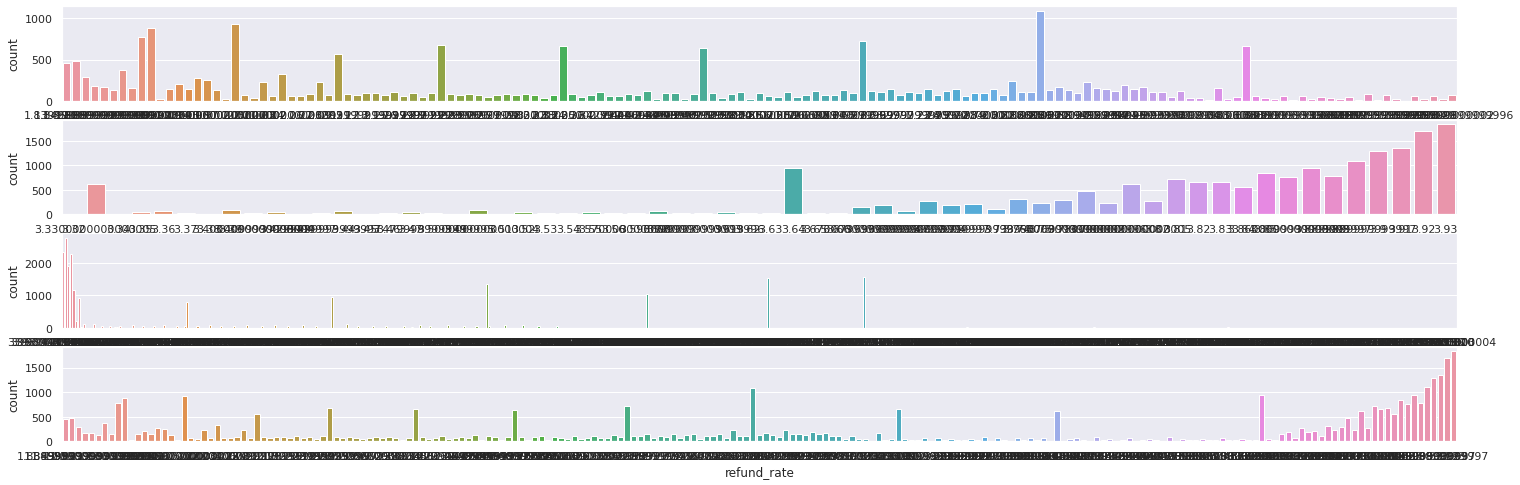

<Figure size 1080x360 with 0 Axes>

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1)
plt.figure(figsize=(10,5))

sns.countplot(data=job_2035c, x='refund_rate', ax = ax1)
sns.countplot(data=job_2035cc, x='refund_rate', ax = ax2)
sns.countplot(data=job_2035ccc, x='refund_rate', ax = ax3)
sns.countplot(data=job_2035ca, x='refund_rate', ax = ax4)


In [ ]:
job_3660.describe()

,age,year,refund,fee,has_paid,income_근로,income_사업,income_기타,refund_rate
count,14362.000000,14362.000000,1.436200e+04,14362.000000,14362.000000,1.436200e+04,1.436200e+04,1.436200e+04,14362.000000
mean,43.719259,2017.929119,2.456230e+05,8581.604233,0.619412,4.876675e+06,1.419542e+06,2.470482e+05,3.537845
std,6.619873,1.525766,3.602628e+05,14053.350405,0.485548,8.394628e+06,2.631108e+06,1.157305e+06,7.180420
min,36.000000,2015.000000,-0.000000e+00,400.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,38.000000,2017.000000,3.400000e+04,400.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.900000
50%,42.000000,2018.000000,1.140000e+05,4300.000000,1.000000,0.000000e+00,3.400000e+05,0.000000e+00,3.330000
75%,49.000000,2019.000000,3.030000e+05,10600.000000,1.000000,7.736500e+06,1.478000e+06,2.600000e+04,3.950000
max,60.000000,2020.000000,6.815000e+06,270800.000000,1.000000,1.823350e+08,2.122400e+07,6.281000e+07,426.670000


In [ ]:
job_3660['income_사업'].value_counts(normalize=True) # 75프로가 사업소득

0.0           0.253655
128000.0      0.004804
28000.0       0.004456
31000.0       0.004456
43000.0       0.004456
                ...   
13739000.0    0.000070
18565000.0    0.000070
3548000.0     0.000070
15836000.0    0.000070
5046000.0     0.000070
Name: income_사업, Length: 3930, dtype: float64

In [ ]:
job_3660['gender'].value_counts(normalize=True) # M: 55% / F: 44%

0    0.555494
1    0.444089
-    0.000418
Name: gender, dtype: float64

In [ ]:
job_3660aaa = job_3660[job_3660['fee']>=400]
job_3660aaa = job_3660aaa[job_3660['fee']<4300] # 통계지표 25~50%미만 62%결제
print(job_3660aaa['has_paid'].value_counts(normalize=True))

job_3660a = job_3660[job_3660['fee']>=4300]
job_3660a = job_3660a[job_3660a['fee']<10600] # 통계지표 50~ 75% 미만 집단 66.7% 결제
print(job_3660a['has_paid'].value_counts(normalize=True))

job_3660aa = job_3660[job_3660['fee']>=10600] # 통계지표 75% 이상 집단 55% 결제
print(job_3660aa['has_paid'].value_counts(normalize=True))

job_3660ab = job_3660[job_3660['fee']>=400]
job_3660ab = job_3660ab[job_3660ab['fee']<10600]
print(job_3660ab['has_paid'].value_counts(normalize=True)) # 25~75% 미만 집단 64.2% 결제

1    0.627601
0    0.372399
Name: has_paid, dtype: float64
1    0.667328
0    0.332672
Name: has_paid, dtype: float64
1    0.551507
0    0.448493
Name: has_paid, dtype: float64
1    0.64255
0    0.35745
Name: has_paid, dtype: float64


In [ ]:
job_3660c = job_3660[job_3660['refund_rate']>=1.90] #통계지표 25~50% 미만 집단 69% 결제
job_3660c = job_3660c[job_3660c['refund_rate']< 3.33]
print(job_3660c['has_paid'].value_counts(normalize=True))

job_3660cc = job_3660[job_3660['refund_rate']>=3.33] #통계지표 50~75% 미만 집단 57% 결제
job_3660cc = job_3660cc[job_3660cc['refund_rate']< 3.95]
print(job_3660cc['has_paid'].value_counts(normalize=True))

job_3660ccc = job_3660[job_3660['refund_rate']>=3.95] #통계지표 75% 이상 집단 54% 결제
print(job_3660ccc['has_paid'].value_counts(normalize=True))

job_3660ca = job_3660[job_3660['refund_rate']>=1.90] #통계지표 25~75% 미만 집단 63% 결제
job_3660ca = job_3660ca[job_3660ca['refund_rate']< 3.95]
print(job_3660ca['has_paid'].value_counts(normalize=True))

1    0.696089
0    0.303911
Name: has_paid, dtype: float64
1    0.572799
0    0.427201
Name: has_paid, dtype: float64
1    0.541398
0    0.458602
Name: has_paid, dtype: float64
1    0.634756
0    0.365244
Name: has_paid, dtype: float64


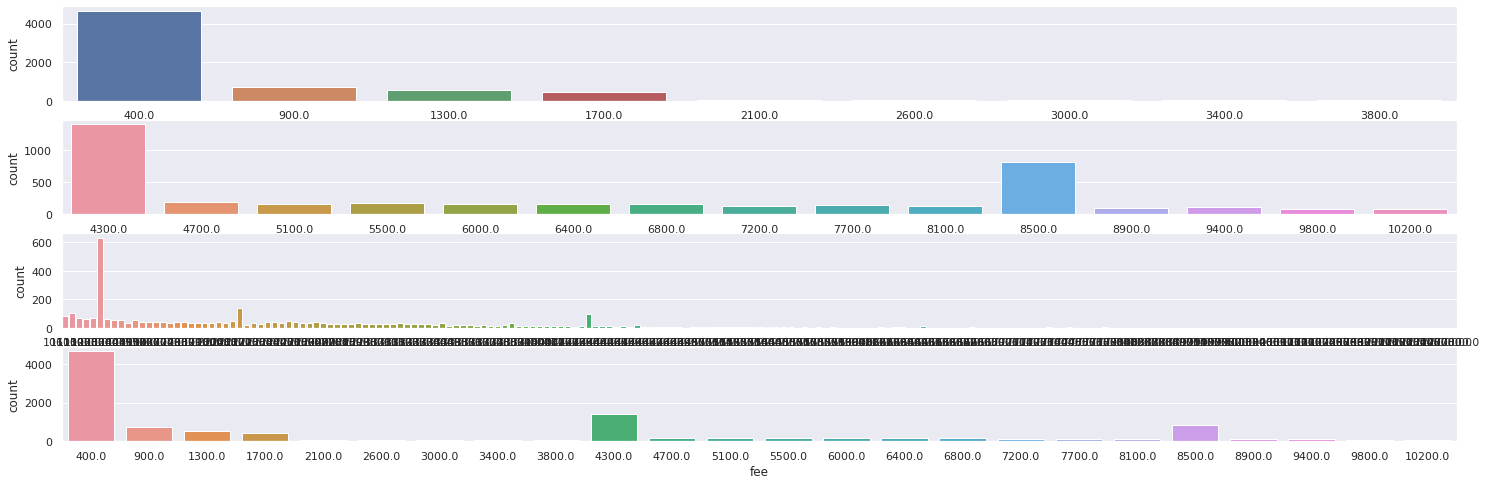

<Figure size 1080x360 with 0 Axes>

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1)
plt.figure(figsize=(15,5))

sns.countplot(data=job_3660aaa, x='fee', ax = ax1)
sns.countplot(data=job_3660a, x='fee', ax = ax2)
sns.countplot(data=job_3660aa, x='fee', ax = ax3)
sns.countplot(data=job_3660ab, x='fee', ax = ax4)

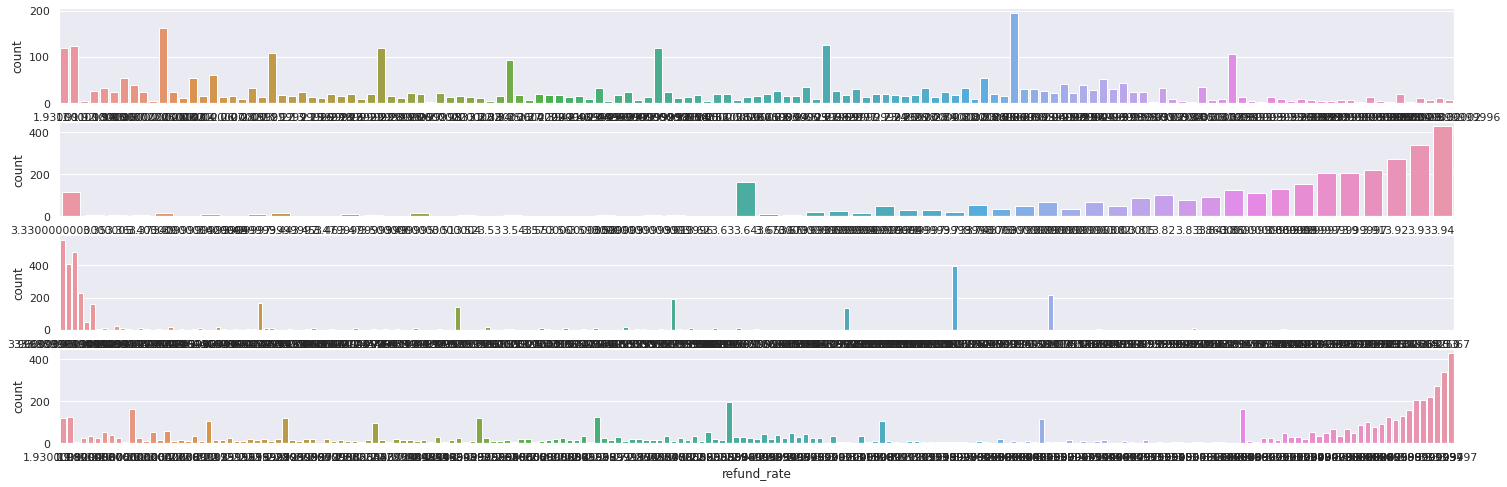

<Figure size 720x360 with 0 Axes>

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1)
plt.figure(figsize=(10,5))

sns.countplot(data=job_3660c, x='refund_rate', ax = ax1)
sns.countplot(data=job_3660cc, x='refund_rate', ax = ax2)
sns.countplot(data=job_3660ccc, x='refund_rate', ax = ax3)
sns.countplot(data=job_3660ca, x='refund_rate', ax = ax4)


#2035 / 3660 연령층 Fee 통계지표

75% 이상일 때 결제하는 비율이 급 하락하는 경향이 보임

25-75프로 미만일 때 64(3660) / 67(2035)% 결제

75프로 이상부터는 55(3660) / 59(2035)% 결제


---
#2035 / 3660 연령층 Refund_Rate 통계지표
25 - 50% 미만일 때 결제하는 비율이 크고 50%이상 부터 급 하락하는 경향
